In [ ]:
import pandas as pd
import numpy as np
import collections
import re

In [ ]:
f=open("text.txt")
doc1=f.read()
f.close()



In [ ]:

doc1

'"It was the best of times,\nit was the worst of times,\nit was the age of wisdom,\nit was the age of foolishness"'

In [ ]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()


In [ ]:
l_doc1

['it',
 'was',
 'the',
 'best',
 'of',
 'times',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness']

In [ ]:
l=l_doc1

In [ ]:
l

['it',
 'was',
 'the',
 'best',
 'of',
 'times',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness']

In [ ]:
wordset=set(l)

In [ ]:
wordset

{'age',
 'best',
 'foolishness',
 'it',
 'of',
 'the',
 'times',
 'was',
 'wisdom',
 'worst'}

In [ ]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [ ]:
bow1 = calculateBOW(wordset,l_doc1)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,times,wisdom,worst,of,best,foolishness,it,was,age,the
0,2,1,1,4,1,1,4,4,2,4


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform([doc1])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,age,best,foolishness,it,of,the,times,was,wisdom,worst
0,2,1,1,4,4,4,2,4,1,1


In [ ]:
print(vectorizer.get_feature_names_out())

['age' 'best' 'foolishness' 'it' 'of' 'the' 'times' 'was' 'wisdom' 'worst']


In [ ]:
import nltk
nltk.download('punkt')
import re
import numpy as np

f= open("text.txt")
text=f.read()
f.close()
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(dataset)

[' it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness ']


In [ ]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
word2count

{'it': 4,
 'was': 4,
 'the': 4,
 'best': 1,
 'of': 4,
 'times': 2,
 'worst': 1,
 'age': 2,
 'wisdom': 1,
 'foolishness': 1}

In [ ]:
words


['it',
 'was',
 'the',
 'best',
 'of',
 'times',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness']

In [ ]:
len(words)

24

In [ ]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [ ]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [ ]:
word_to_ix

{'times': 0,
 'wisdom': 1,
 'worst': 2,
 'of': 3,
 'best': 4,
 'foolishness': 5,
 'it': 6,
 'was': 7,
 'age': 8,
 'the': 9}

In [ ]:
ix_to_word

{0: 'times',
 1: 'wisdom',
 2: 'worst',
 3: 'of',
 4: 'best',
 5: 'foolishness',
 6: 'it',
 7: 'was',
 8: 'age',
 9: 'the'}

In [ ]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['it', 'was', 'best', 'of'], 'the'), (['was', 'the', 'of', 'times'], 'best'), (['the', 'best', 'times', 'it'], 'of'), (['best', 'of', 'it', 'was'], 'times'), (['of', 'times', 'was', 'the'], 'it')]


In [ ]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [ ]:
embeddings

array([[0.12753023, 0.76639246, 0.29417805, 0.49864344, 0.28540891,
        0.92335652, 0.61972294, 0.17965863, 0.4250801 , 0.18448583],
       [0.09703826, 0.12232292, 0.85303326, 0.40122685, 0.23569324,
        0.82317851, 0.63644184, 0.47581106, 0.77180941, 0.66537804],
       [0.68367622, 0.92911568, 0.88916762, 0.48583216, 0.89545455,
        0.78940721, 0.39992053, 0.62405228, 0.76421368, 0.83536629],
       [0.63295587, 0.45902611, 0.99391809, 0.03517299, 0.01835442,
        0.72271675, 0.17467742, 0.08446911, 0.86136536, 0.56734413],
       [0.51287645, 0.43461977, 0.57727419, 0.81078948, 0.34730064,
        0.0345898 , 0.08626206, 0.84012386, 0.65971729, 0.46155289],
       [0.14689684, 0.83020539, 0.78939586, 0.20985939, 0.84508367,
        0.80390087, 0.85336259, 0.3670765 , 0.78822744, 0.40782549],
       [0.59870693, 0.3910413 , 0.95863114, 0.94439944, 0.59314923,
        0.83810834, 0.93785667, 0.63267575, 0.14345581, 0.80502364],
       [0.36990522, 0.98602854, 0.2585928

In [ ]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [ ]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [ ]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [ ]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [ ]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [ ]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [ ]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [ ]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [ ]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

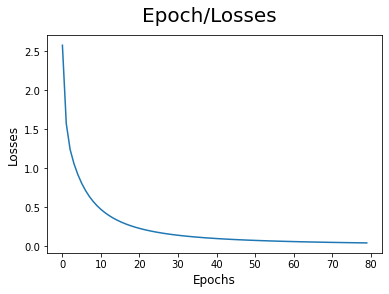

In [ ]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [ ]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predict(['it', 'was', 'best', 'of'])

'the'

In [ ]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

0.95